In [3]:
import pandas as pd
# Load the dataset
arrest_data = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20241112.csv')
print(arrest_data.head())
print(arrest_data.info())
print(arrest_data.columns)

   ARREST_KEY ARREST_DATE  PD_CD                   PD_DESC  KY_CD  \
0   281240883  01/28/2024  105.0         STRANGULATION 1ST  106.0   
1   282884120  02/27/2024  263.0               ARSON 2,3,4  114.0   
2   283137868  03/03/2024  109.0  ASSAULT 2,1,UNCLASSIFIED  106.0   
3   287001362  05/16/2024  109.0  ASSAULT 2,1,UNCLASSIFIED  106.0   
4   287829614  06/02/2024  105.0         STRANGULATION 1ST  106.0   

        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  \
0  FELONY ASSAULT  PL 1211200          F           Q              105   
1           ARSON  PL 1501001          F           Q              107   
2  FELONY ASSAULT  PL 1200502          F           B               48   
3  FELONY ASSAULT  PL 1200512          F           S              121   
4  FELONY ASSAULT  PL 1211200          F           Q              100   

   JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD  \
0                  0     25-44        M     WHITE     1057545      20

In [4]:
# Check for missing values
missing_values = arrest_data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          6
PD_DESC                        0
KY_CD                         26
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1109
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64


In [5]:
# Fill missing values for PD_CD and KY_CD with -1 as placeholders using .loc
arrest_data.loc[:, 'PD_CD'] = arrest_data['PD_CD'].fillna(-1)
arrest_data.loc[:, 'KY_CD'] = arrest_data['KY_CD'].fillna(-1)

# Fill missing LAW_CAT_CD with 'Unknown' as a placeholder using .loc
arrest_data.loc[:, 'LAW_CAT_CD'] = arrest_data['LAW_CAT_CD'].fillna("Unknown")

# Drop 'New Georeferenced Column' as it has a high number of missing values
arrest_data.drop(columns=['New Georeferenced Column'], inplace=True)

# Verify that missing values have been handled
print("Remaining missing values:\n", arrest_data.isnull().sum())


Remaining missing values:
 ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64


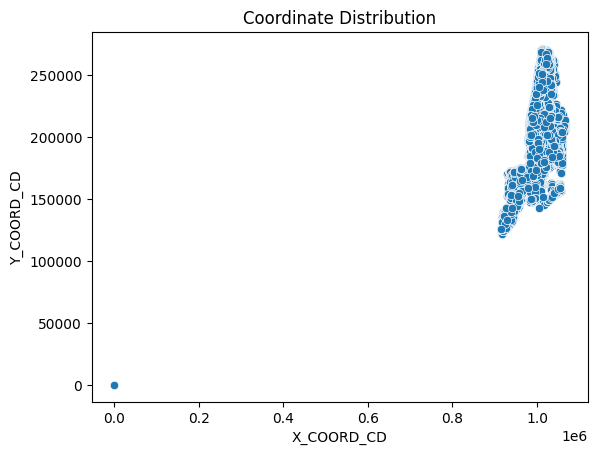

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot coordinates to check for outliers
sns.scatterplot(x='X_COORD_CD', y='Y_COORD_CD', data=arrest_data)
plt.title("Coordinate Distribution")
plt.show()

# Remove rows where coordinates are clearly out of NYC bounds
arrest_data = arrest_data[(arrest_data['Latitude'] > 40.4) & (arrest_data['Latitude'] < 40.9) &
                          (arrest_data['Longitude'] > -74.3) & (arrest_data['Longitude'] < -73.6)]


In [7]:
# Standardize categorical data
arrest_data['ARREST_BORO'] = arrest_data['ARREST_BORO'].str.upper().str.strip()

# Convert ARREST_DATE to datetime
arrest_data['ARREST_DATE'] = pd.to_datetime(arrest_data['ARREST_DATE'], errors='coerce')


In [8]:
# Check for any remaining missing values
print("Remaining missing values:\n", arrest_data.isnull().sum())

# Verify data types
print(arrest_data.dtypes)


Remaining missing values:
 ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64
ARREST_KEY                    int64
ARREST_DATE          datetime64[ns]
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COOR

In [9]:
# Summary statistics of numerical columns
summary_stats = arrest_data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Arrests by borough
arrests_by_borough = arrest_data['ARREST_BORO'].value_counts()
print("\nArrests by Borough:\n", arrests_by_borough)

# Group by arrest date to see trends over time (monthly)
arrests_by_date = arrest_data.groupby(arrest_data['ARREST_DATE'].dt.to_period('M')).size()
print("\nArrests Over Time (by Month):\n", arrests_by_date)

# Distribution of suspect age groups
age_group_distribution = arrest_data['AGE_GROUP'].value_counts()
print("\nArrests by Age Group:\n", age_group_distribution)



Summary Statistics:
          ARREST_KEY                    ARREST_DATE          PD_CD  \
count  1.951610e+05                         195161  195161.000000   
mean   2.870577e+08  2024-05-17 10:46:15.763600128     430.711756   
min    2.797635e+08            2024-01-01 00:00:00      -1.000000   
25%    2.835069e+08            2024-03-10 00:00:00     117.000000   
50%    2.871294e+08            2024-05-19 00:00:00     397.000000   
75%    2.906266e+08            2024-07-25 00:00:00     705.000000   
max    2.941500e+08            2024-09-30 00:00:00     997.000000   
std    4.114398e+06                            NaN     271.962996   

               KY_CD  ARREST_PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
count  195161.000000    195161.000000      195161.000000  1.951610e+05   
mean      251.951625        63.587566           0.921695  1.005663e+06   
min        -1.000000         1.000000           0.000000  9.139790e+05   
25%       113.000000        40.000000           0.000000  9.

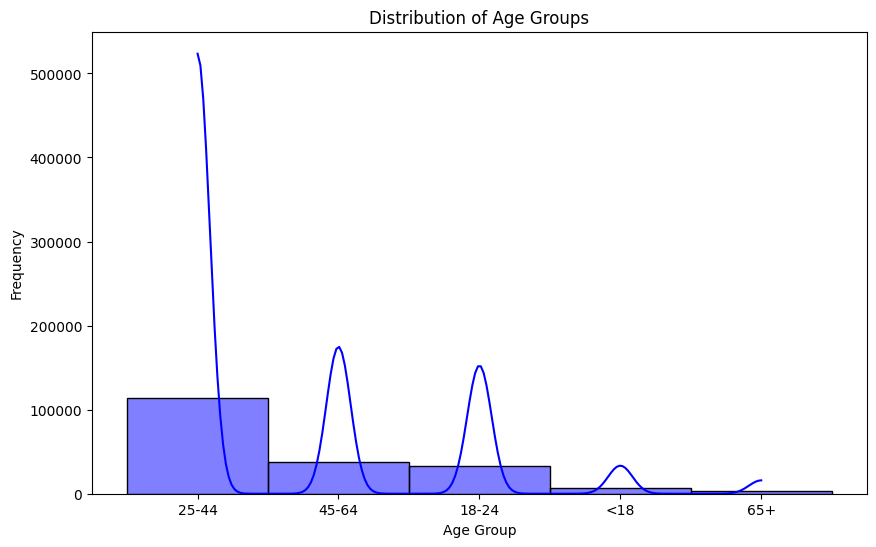

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for AGE_GROUP (if AGE_GROUP is numeric)
plt.figure(figsize=(10, 6))
sns.histplot(arrest_data['AGE_GROUP'], kde=True, color='blue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()


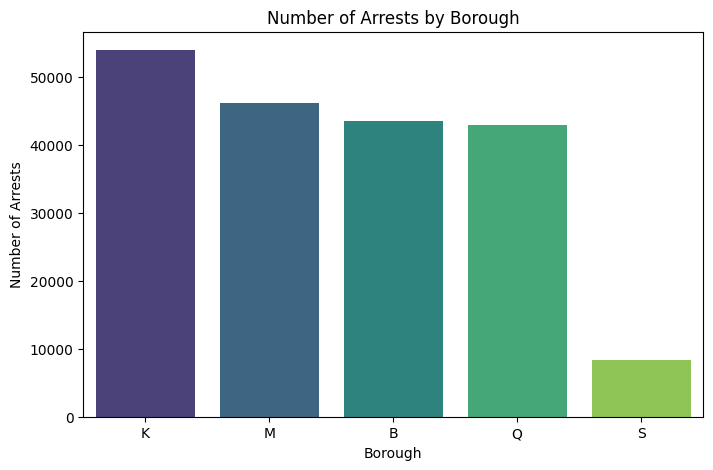

In [11]:
#Arrests by Borough
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of arrests per borough
arrests_by_borough = arrest_data['ARREST_BORO'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=arrests_by_borough.index, y=arrests_by_borough.values, hue=arrests_by_borough.index, dodge=False, palette="viridis", legend=False)
plt.title("Number of Arrests by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Arrests")
plt.show()


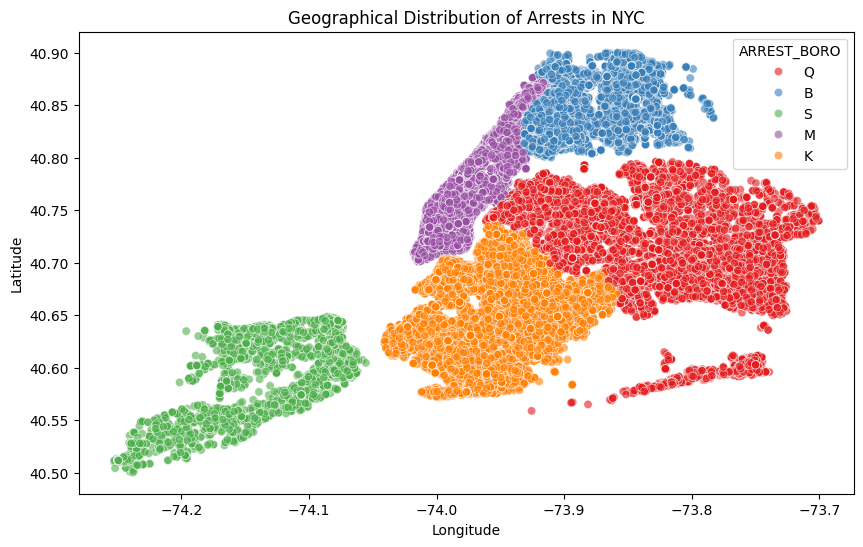

In [12]:
# Scatter plot of Latitude vs. Longitude to identify potential patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=arrest_data, hue='ARREST_BORO', palette='Set1', alpha=0.6)
plt.title('Geographical Distribution of Arrests in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


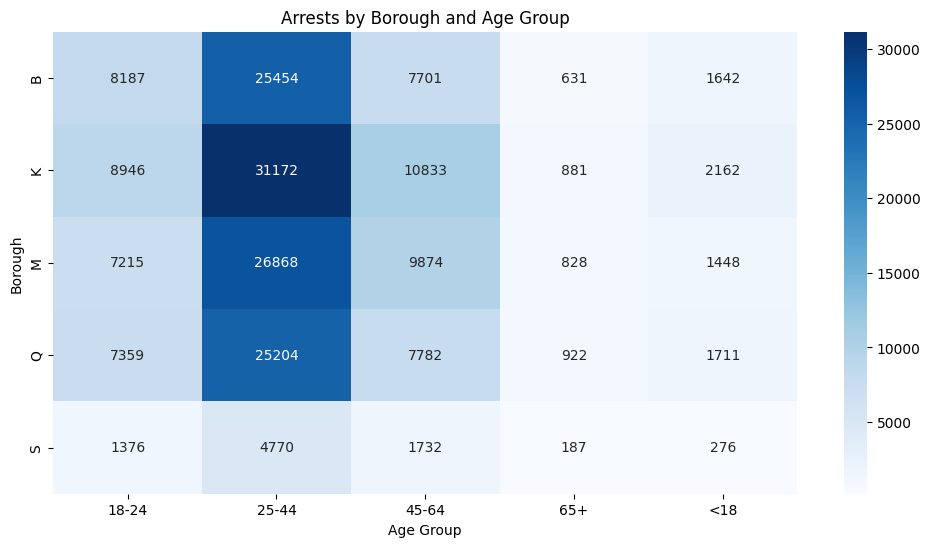

In [13]:
# Grouping the data by Borough and Age Group
arrests_by_borough_age = arrest_data.groupby(['ARREST_BORO', 'AGE_GROUP']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(arrests_by_borough_age, annot=True, cmap='Blues', fmt='d')
plt.title('Arrests by Borough and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Borough')
plt.show()


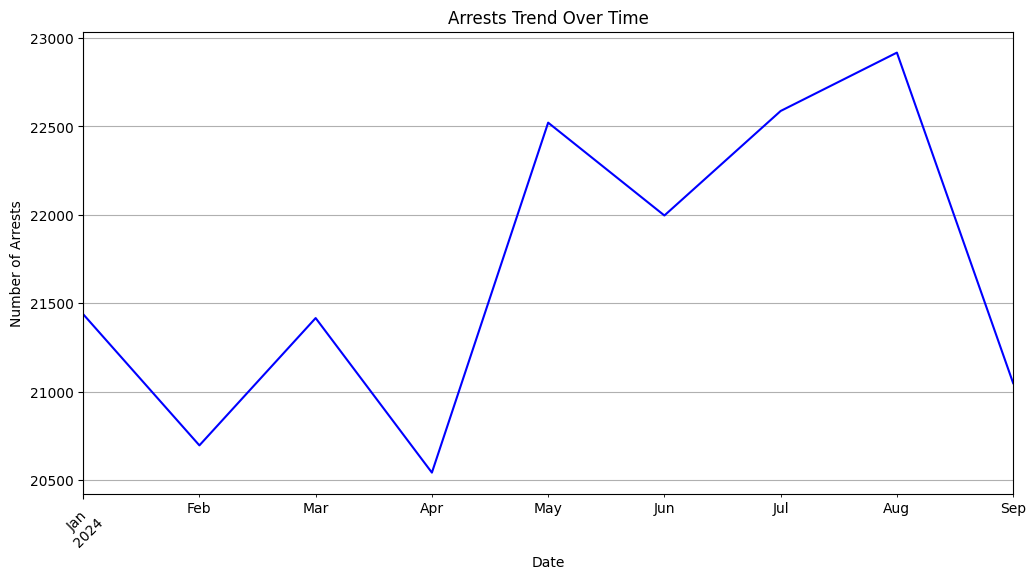

In [14]:
# Plotting Arrests Trend Over Time
plt.figure(figsize=(12, 6))
arrests_by_date.plot(kind='line', color='b')
plt.title('Arrests Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


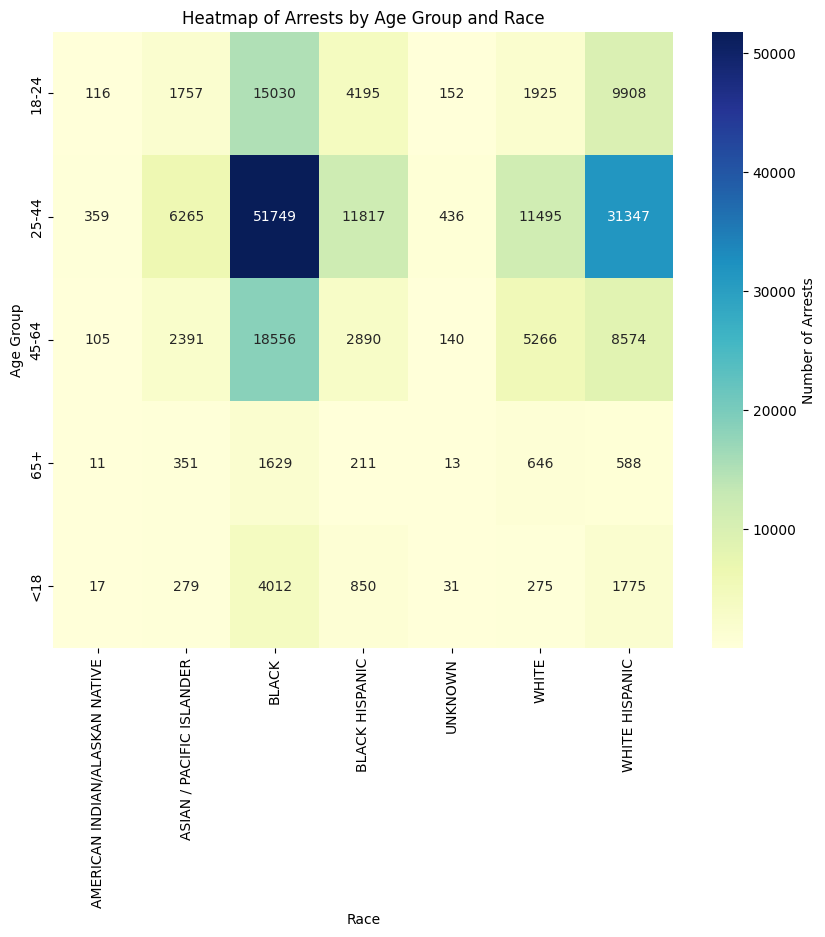

In [15]:
# Group by 'AGE_GROUP' and 'PERP_RACE' to count the number of arrests
heatmap_data = arrest_data.groupby(['AGE_GROUP', 'PERP_RACE']).size().reset_index(name='COUNT')

# Pivot the data so that AGE_GROUPs are rows, PERP_RACE are columns, and COUNT is the value
heatmap_data_pivot = heatmap_data.pivot(index='AGE_GROUP', columns='PERP_RACE', values='COUNT')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_pivot, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Arrests'})
plt.title('Heatmap of Arrests by Age Group and Race')
plt.xlabel('Race')
plt.ylabel('Age Group')
plt.show()

<Figure size 1400x800 with 0 Axes>

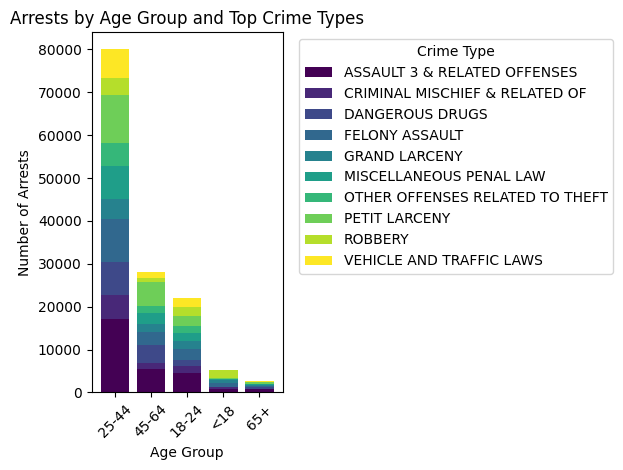

In [16]:
# Step 1: Find the top 10 most common crime types
top_crimes = arrest_data['OFNS_DESC'].value_counts().head(10).index

# Step 2: Filter the data for only these top crimes
filtered_data = arrest_data[arrest_data['OFNS_DESC'].isin(top_crimes)]

# Step 3: Group by 'AGE_GROUP' and 'OFNS_DESC' to count arrests, only for top crimes
age_group_crime_data = filtered_data.groupby(['AGE_GROUP', 'OFNS_DESC']).size().unstack(fill_value=0)

# Step 4: Sort by total number of arrests for each age group
age_group_crime_data = age_group_crime_data.loc[age_group_crime_data.sum(axis=1).sort_values(ascending=False).index]

# Step 5: Plotting a stacked bar chart
plt.figure(figsize=(14, 8))
ax = age_group_crime_data.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

# Step 6: Customize the chart
plt.title('Arrests by Age Group and Top Crime Types')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()